In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


n = int(input('Количество точек'))
a = 1
alpha = .2
d = .45
r = .9
b = 4.95

x1 = np.zeros(n)
x2 = np.zeros(n)
x3 = np.zeros(n)
step = np.zeros(n)
x1[0] = 1
x2[0] = 0.1
x3[0] = 1

def F(x):
    if (x <= a):
        return alpha*x
    if (x > a):
        return alpha*x + alpha*(b-a)
print(F(1))
def f1(x1, x2, x3):
    return F(x1) + d*(x2 + x3 - 2*x1)
def f2(x1, x2, x3):
    return F(x2) + d*(x1- x2 + r*(x3 - x2))
def f3(x1, x2, x3):
    return F(x3) + d*(x1 - x3 + r*(x2 - x3))

for i in range(n-1):
    print(i)
    x1[i + 1] = f1(x1[i], x2[i], x3[i])
    x2[i + 1] = f2(x1[i], x2[i], x3[i])
    x3[i + 1] = f3(x1[i], x2[i], x3[i])
    step[i] = i
step[n-1] = n
print("x1: ", x1, "\n x2: ", x2, "\n x3: ", x3)
plt.plot(step, x1, color = 'red')
plt.plot(step, x2, color = 'red')
plt.plot(step, x3, color = 'red')
plt.show()

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

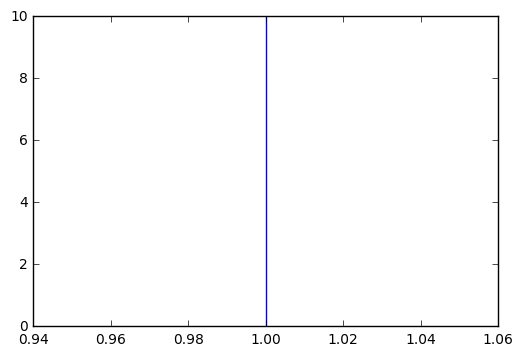

In [1]:
import matplotlib.pyplot as plt
plt.plot([1, 1], [0, 10])
plt.show()

In [2]:
import matplotlib.pyplot as plt

def f(x):
    plt.plot([x, x], [], color = col)
for i in range(100):
    f(1)

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

In [5]:
my_file = open('snake.txt', 'w')